# Skin Cancer (Melanoma) Detection

### 1) Data Reading/Data Understanding:

In [14]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
train_path="/content/gdrive/MyDrive/melenoma/Train/"
test_path="/content/gdrive/MyDrive/melenoma/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [17]:
# Counting images for both Train and Test folder
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### 2) Dataset Creation:

In [18]:
# Creating dataset
batch_size = 32
img_height = 180
img_width = 180

- Train Data Set Creation:

In [19]:
# Loading the above images the using 'image_dataset_from_directory' utility
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


- Validation Data Set Creation:

In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [21]:
# Listing all the classes of skin cancer
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3) Dataset visualisation:

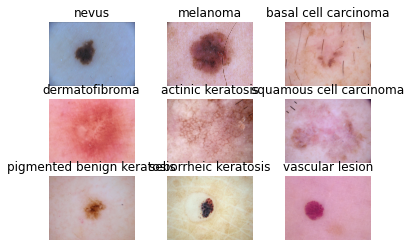

In [22]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 4) Model Building & training:

#### Model 4.1: Creating the model 1:

In [24]:
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

model_1=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### Compiling the model 1:

In [25]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model 1:

In [26]:
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 104ms/step - loss: 3.8534 - accuracy: 0.2104 - val_loss: 2.0518 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.8346 - accuracy: 0.3075 - val_loss: 1.7636 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.6899 - accuracy: 0.3811 - val_loss: 1.7507 - val_accuracy: 0.4340
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.5756 - accuracy: 0.4369 - val_loss: 1.5055 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5146 - accuracy: 0.4676 - val_loss: 1.4942 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4406 - accuracy: 0.4855 - val_loss: 1.4581 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3400 - accuracy: 0.5346 - val_loss: 1.4898 - val_accuracy: 0.5078
Epoch 8/20


In [27]:
# View the summary of all layers
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

#### Visualizing training results model 1:

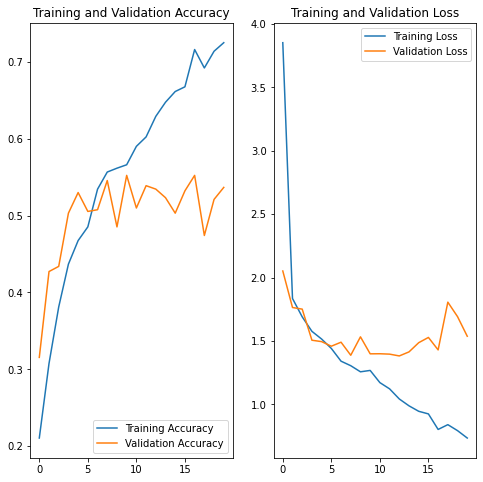

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations from model 1:

- The accuracy of the model_1 for the Training data set is at 72.54% and Validation accuracy is at 53.69%. The validation loss as observed is very high.
- The Validation accuracy is far from the training accuracy.
- This could also be indicative of some Overfit in the model.
- We could add some Dropout layers and remove the BatchNormalization layers.
- And by adding a few more layers, we could improve the accuracy by trying to extract more features.

#### Creating the model 2:

In [29]:
model_2=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### Compiling the model 2:

In [30]:
model_2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics='accuracy')

#### Training the model 2:

In [31]:
epochs = 20
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 106ms/step - loss: 2.0940 - accuracy: 0.1908 - val_loss: 2.0309 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 94ms/step - loss: 2.0358 - accuracy: 0.1842 - val_loss: 2.0265 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 94ms/step - loss: 1.9536 - accuracy: 0.2634 - val_loss: 1.8966 - val_accuracy: 0.2573
Epoch 4/20
56/56 [==============================] - 5s 94ms/step - loss: 1.8656 - accuracy: 0.2935 - val_loss: 2.0602 - val_accuracy: 0.2215
Epoch 5/20
56/56 [==============================] - 5s 95ms/step - loss: 1.8338 - accuracy: 0.2963 - val_loss: 1.7558 - val_accuracy: 0.3468
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 1.7765 - accuracy: 0.3415 - val_loss: 1.7115 - val_accuracy: 0.3579
Epoch 7/20
56/56 [==============================] - 5s 95ms/step - loss: 1.6702 - accuracy: 0.3834 - val_loss: 1.6804 - val_accuracy: 0.4228
Epoch 8/20
5

#### Visualizing training results model 2:

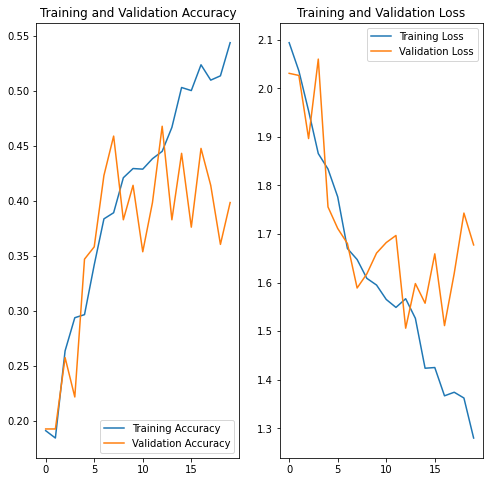

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations from model 2:

- Train dataset accuracy has been dropped to 54% and Validation accuracy to 40%.
- Model 2 is a better model compared to the Model 1 as there seems to be No Overfit.

### 5) Data Augmentation:

#### Specifying the Augmentation:

In [33]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

#### Visualizing the Augmented Data:

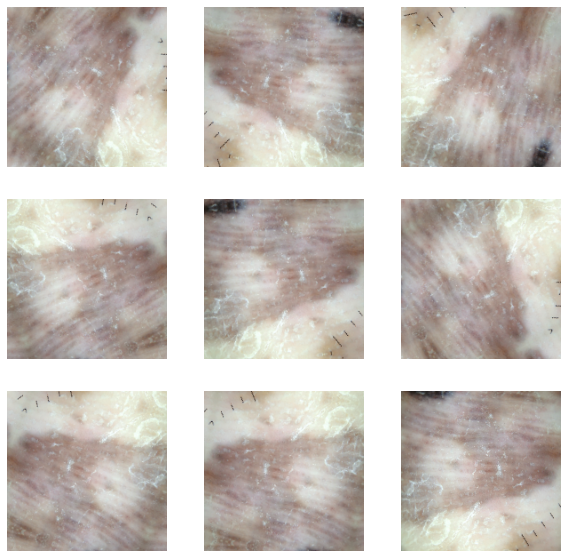

In [34]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

#### Creating the model 3:

In [35]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### Compiling the model 3:

In [36]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### Training the model 3:

In [37]:
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 101ms/step - loss: 2.1707 - accuracy: 0.2037 - val_loss: 2.0492 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 98ms/step - loss: 2.0371 - accuracy: 0.1959 - val_loss: 2.0389 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 6s 98ms/step - loss: 2.0230 - accuracy: 0.2148 - val_loss: 1.9868 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 6s 98ms/step - loss: 1.8777 - accuracy: 0.2980 - val_loss: 1.7742 - val_accuracy: 0.3624
Epoch 5/20
56/56 [==============================] - 6s 98ms/step - loss: 1.7883 - accuracy: 0.3549 - val_loss: 1.6538 - val_accuracy: 0.3848
Epoch 6/20
56/56 [==============================] - 6s 98ms/step - loss: 1.6578 - accuracy: 0.3811 - val_loss: 1.7391 - val_accuracy: 0.3579
Epoch 7/20
56/56 [==============================] - 6s 98ms/step - loss: 1.6796 - accuracy: 0.3811 - val_loss: 1.5989 - val_accuracy: 0.4362
Epoch 8/20
5

#### Visualizing training results model 3: 

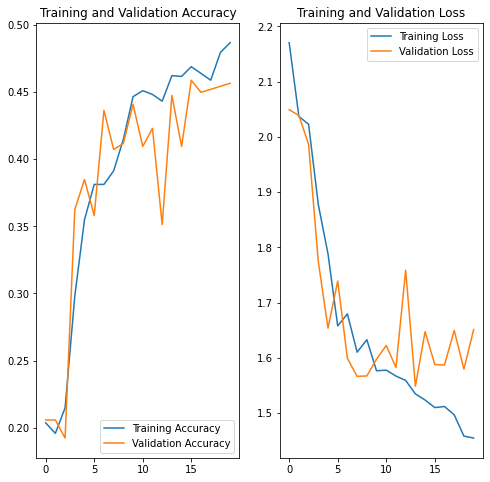

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 6) Checking for Class Imbalance: 

In [39]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


<BarContainer object of 9 artists>

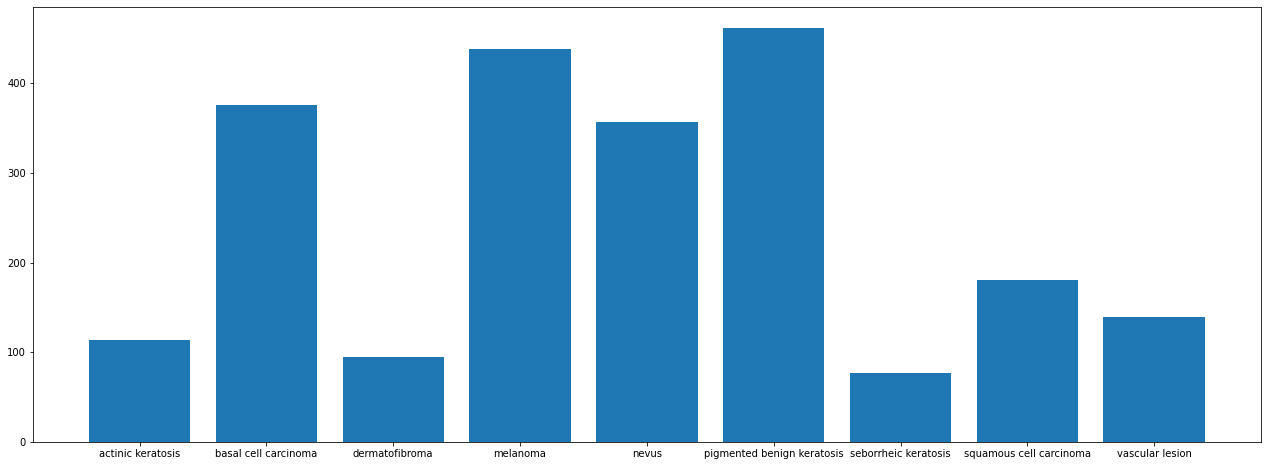

In [40]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(22,8))
plt.bar(class_names,count)

#### 7: Using Augmentor for Class Imbalance Treatment: 

In [41]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- To use Augmentor, the following general procedure is followed:
  - Instantiate a Pipeline object pointing to a directory containing your initial image data set.
  - Define a number of operations to perform on this data set using your Pipeline object.
  - Execute these operations by calling the Pipeline’s sample() method.

#### 7.1) Using Augmentor: 

In [42]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F32185F5B50>: 100%|██████████| 500/500 [00:19<00:00, 26.15 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F322A035350>: 100%|██████████| 500/500 [00:18<00:00, 27.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322D997710>: 100%|██████████| 500/500 [00:18<00:00, 27.25 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F32BEA56450>: 100%|██████████| 500/500 [01:17<00:00,  6.42 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F32B0303A10>: 100%|██████████| 500/500 [01:28<00:00,  5.64 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322D7FEA90>: 100%|██████████| 500/500 [00:18<00:00, 27.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F32BEC07FD0>: 100%|██████████| 500/500 [00:41<00:00, 11.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322AF62150>: 100%|██████████| 500/500 [00:17<00:00, 27.91 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/melenoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322D9D3310>: 100%|██████████| 500/500 [00:18<00:00, 27.16 Samples/s]


In [43]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


 - Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [46]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [47]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


#### 7.2) Observations:

- The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.
- So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### 8) Modelling Augmented Data: 

In [48]:
batch_size = 32
img_height = 180
img_width = 180

In [49]:
# Creating train dataset
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [50]:
# Creating task validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Model 4: Creating the Model 4:

In [51]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### Compiling the model 4:

In [52]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### Train the model 4:

In [53]:
epochs = 30
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 31s 175ms/step - loss: 2.4620 - accuracy: 0.2151 - val_loss: 1.7611 - val_accuracy: 0.3920
Epoch 2/30
169/169 [==============================] - 31s 178ms/step - loss: 1.6336 - accuracy: 0.3780 - val_loss: 1.4487 - val_accuracy: 0.4878
Epoch 3/30
169/169 [==============================] - 30s 172ms/step - loss: 1.4211 - accuracy: 0.4592 - val_loss: 1.2973 - val_accuracy: 0.5152
Epoch 4/30
169/169 [==============================] - 30s 173ms/step - loss: 1.3057 - accuracy: 0.5163 - val_loss: 1.2090 - val_accuracy: 0.5516
Epoch 5/30
169/169 [==============================] - 32s 182ms/step - loss: 1.1367 - accuracy: 0.5783 - val_loss: 1.0711 - val_accuracy: 0.6206
Epoch 6/30
169/169 [==============================] - 30s 173ms/step - loss: 1.0157 - accuracy: 0.6269 - val_loss: 1.0227 - val_accuracy: 0.6399
Epoch 7/30
169/169 [==============================] - 30s 174ms/step - loss: 0.8889 - accuracy: 0.6693 - val_loss: 0.8792 - val_ac

#### Visualize the model 4:

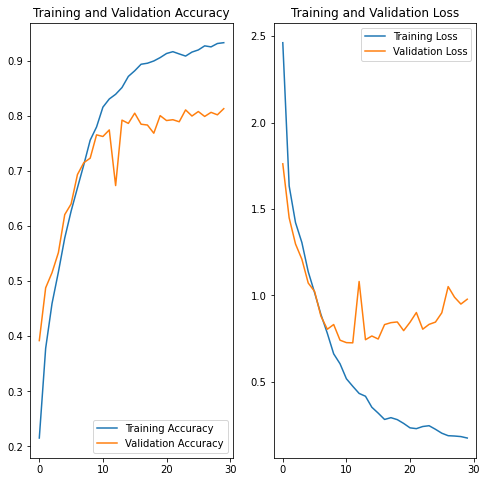

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Observations:

 - The training accuracy seems to be nearly ~93%.
 - The validation accuracy is nearly ~82%.
 - Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.
 - Much better models could be built or tried out using more epochs and more layers.